In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity #text analysis in recommendation system
import matplotlib.pyplot as plt #plots and visualisation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #visualising text data where frequency corressponds to the size of the text
import nltk #tokenization,parsing
import re #regular expression analysing
from nltk.corpus import stopwords #remove meaningless words like is,for,an
import string

data = pd.read_csv("jobs.csv")
print(data.head())

   Unnamed: 0                    Job Salary Job Experience Required  \
0           0   Not Disclosed by Recruiter               5 - 10 yrs   
1           1   Not Disclosed by Recruiter                2 - 5 yrs   
2           2   Not Disclosed by Recruiter                0 - 1 yrs   
3           3       2,00,000 - 4,00,000 PA.               0 - 5 yrs   
4           4   Not Disclosed by Recruiter                2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1   pre sales| closing| software knowledge| clien...   
2   Computer science| Fabrication| Quality check|...   
3                                  Technical Support   
4   manual testing| test engineering| test cases|...   

                                Role Category  \
0                                 Advertising   
1                                Retail Sales   
2                                         R&D   
3  Admin/Maintenance/Security/Datawareho

In [2]:
data = data.drop("Unnamed: 0",axis=1)

In [3]:
data.isnull().sum() #remove null values

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

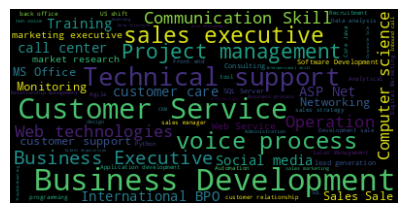

In [6]:
text = " ".join(i for i in data["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() #keyskills visualisation excluding stopwords

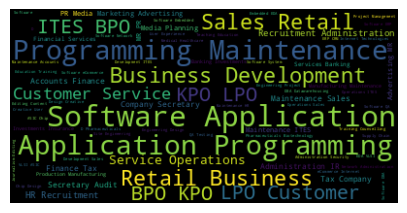

In [7]:
text = " ".join(i for i in data["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() #areas of job visualisation excluding stopwords

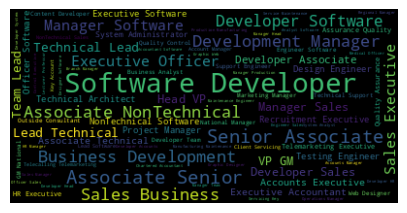

In [8]:
text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() #visualising job title excluding stopwords

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'data' is a DataFrame and 'Key Skills' is a column in that DataFrame
feature = data["Key Skills"].tolist()

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(feature)

# Compute the cosine similarity matrix
similarity = cosine_similarity(tfidf_matrix)


In [10]:
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [11]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required',
                 'Key Skills']].iloc[newsindices]

print(jobs_recommendation("Software Developer"))

                                       Job Title Job Experience Required  \
6249          Sales/Business Development Manager               4 - 5 yrs   
6248                          Software Developer               2 - 5 yrs   
6247  Associate/Senior Associate -(NonTechnical)              5 - 10 yrs   
6246                          Software Developer               1 - 6 yrs   
6245  Associate/Senior Associate -(NonTechnical)               1 - 4 yrs   

                                             Key Skills  
6249   Networking| Printing| Aerospace| Raw material...  
6248   PHP| MVC| Laravel| AWS| SDLC| Wordpress| LAMP...  
6247   Data analysis| Investment banking| Financial ...  
6246   Coding| Wordpress| Commerce| HTML| Troublesho...  
6245   client servicing| client support| background ...  
